# Jupyter notebook

Import packages and set up the field for the predator and prey to move in.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from opencv import cv2

# Set up a square array which will represent the field available to the predator and prey
array_size = 1000
prey_array_R = np.zeros((array_size, array_size))
pred_array_G = np.zeros((array_size, array_size))
land_array_B = np.zeros((array_size, array_size))


# Read the image (replace 'my_image.jpg' with your image path)
img = cv2.imread("my_image.jpg", cv2.IMREAD_ANYCOLOR)

# Create an empty RGB array
rgbArray = np.zeros((array_size, array_size, 3), dtype='uint8')
rgbArray[..., 0] = prey_array_R * 256
rgbArray[..., 1] = pred_array_G * 256
rgbArray[..., 2] = land_array_B * 256

# Convert the array to an image
rgbArray_img = Image.fromarray(rgbArray)

# Save the image (e.g., as 'myimg.jpeg') overwrite the image each time
rgbArray_img.save('rgbArray_img.jpeg')


ImportError: DLL load failed while importing cv2: The specified module could not be found.

## PREY STARTING CONDITIONS
Set up the prey's starting position, the prey's starting velocity, and the prey's predator detection distance.

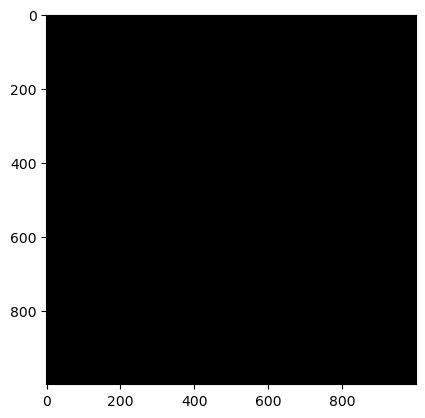

0.0


In [23]:
### PREY ###
# Prey parameters
walking_speed = 3

# Set up a random starting position (x,y) in the array for the prey
# random number between 1 and array_size
x = np.random.randint(1, array_size )
y = np.random.randint(1, array_size)
x, y = (x, y)

# Set up a loop to move the walker in a random direction
for i in range(100000):
    direction = np.random.choice(['up', 'down', 'left', 'right'])
    if direction == 'up':
        x, y = (x, y+walking_speed)
    elif direction == 'down':
        x, y = (x, y-walking_speed)
    elif direction == 'left':
        x, y = (x-walking_speed, y)
    elif direction == 'right':
        x, y = (x+walking_speed, y)
    # If the walker reaches the edge of the array on either side, it will turn around and move in the opposite direction
    if x > array_size:
        x = x - walking_speed
    elif x < 0:
        x = x + walking_speed
    elif y > array_size:
        y = y - walking_speed
    elif y < 0:
        y = y + walking_speed
    # Add 1 to the array at the new position of the prey if the position equals zero, else add 1 to the position
    prey_array_R[x, y] == 1

    # Create an empty RGB array
    rgbArray[..., 0] = prey_array_R * 256
    rgbArray[..., 1] = pred_array_G * 256
    rgbArray[..., 2] = land_array_B * 256

    # Convert the array to an image
    rgbArray_img = Image.fromarray(rgbArray)

    # Display the modified image
    cv2.imshow("Modified Image", rgbArray_img)

    # Wait for a key press (0 means wait indefinitely)
    key = cv2.waitKey(0)

    # Press 'Esc' to exit the loop
    if key == 27:
        break

# Close the window
cv2.destroyAllWindows()

    

    











